# Cafe Recommender System Using Sentiment Analysis

## Dataset
We will be using cafe_data.csv and review.csv which includes about 1500 textual reviews of 16 different cafes from Google Maps

In [3]:
import pandas as pd
import numpy as np
import nltk

# load csv file 

review_data = pd.read_csv('review.csv', names=['user_id','text','cafe_id'], usecols=[1,3,4])

cafe_data = pd.read_csv('cafe_data.csv', names=['cafe_id','cafe_name'], usecols=[0,1])

# we will be using cafe_data.csv to get cafe_name that matches the cafe_id of the samples in review.csv 

df = pd.merge(cafe_data, review_data)

df.reset_index(inplace=True)

df

,index,cafe_id,cafe_name,user_id,text
0,0,1,Elixr Coffee Roasters,619,"As a visitor from Miami, my experience at Elix..."
1,1,1,Elixr Coffee Roasters,298,Elixr was a nice spot on a busy Saturday in Ph...
2,2,1,Elixr Coffee Roasters,620,This is my first time coming and I ordered the...
3,3,1,Elixr Coffee Roasters,267,I ordered the iced strawberry oat milk latte a...
4,4,1,Elixr Coffee Roasters,621,Cozy little coffee shop with well crafted latt...
...,...,...,...,...,...
1551,1551,65,Habitat Coffee House,1460,Great coffee and great service. A very cute an...
1552,1552,65,Habitat Coffee House,1461,Stopped by on the way to do some sight seeing....
1553,1553,65,Habitat Coffee House,1462,Very cute shop with friendly baristas and real...
1554,1554,65,Habitat Coffee House,1463,This place is freaking adorable. Delicious cha...


## NLTK

In [4]:
example = df['text'][4]

# tokenize

tokens = nltk.word_tokenize(example)
print(tokens)

['Cozy', 'little', 'coffee', 'shop', 'with', 'well', 'crafted', 'lattes', 'and', 'drinks', '.', 'My', 'boyfriend', 'got', 'the', 'salted', 'caramel', 'latte', 'and', 'it', 'was', 'so', 'good', '.', 'I', 'got', 'a', 'Dirty', 'Matcha', 'and', 'that', 'was', 'good', 'as', 'well', '.', 'They', 'have', 'mastered', 'the', 'tasty', 'drink', 'without', 'it', 'being', 'sweet', ',', 'impressed', '😎', '…']


In [10]:
# get part of speech each token is
tagged = nltk.pos_tag(tokens)

# group the tokens into chunks of texts
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Cozy/NNP)
  little/JJ
  coffee/NN
  shop/NN
  with/IN
  well/RB
  crafted/VBN
  lattes/NNS
  and/CC
  drinks/NNS
  ./.
  My/PRP$
  boyfriend/NN
  got/VBD
  the/DT
  salted/VBN
  caramel/NN
  latte/NN
  and/CC
  it/PRP
  was/VBD
  so/RB
  good/JJ
  ./.
  I/PRP
  got/VBD
  a/DT
  Dirty/NNP
  Matcha/NNP
  and/CC
  that/IN
  was/VBD
  good/JJ
  as/RB
  well/RB
  ./.
  They/PRP
  have/VBP
  mastered/VBN
  the/DT
  tasty/JJ
  drink/NN
  without/IN
  it/PRP
  being/VBG
  sweet/JJ
  ,/,
  impressed/JJ
  😎/NN
  …/NN)


## Sentiment Analysis with NLTK's VADER

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
# get polarity score 
sia = SentimentIntensityAnalyzer()

score = sia.polarity_scores(example)
print(score)

{'neg': 0.102, 'neu': 0.631, 'pos': 0.267, 'compound': 0.8457}


In [7]:
# run the polarity scores on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    itext = row['text']
    id = row['index']
    result[id] = sia.polarity_scores(itext)

  0%|          | 0/1556 [00:00<?, ?it/s]

100%|██████████| 1556/1556 [00:00<00:00, 6098.37it/s]


In [8]:
vaders = pd.DataFrame(result).T
vaders

,neg,neu,pos,compound
0,0.000,0.810,0.190,0.8016
1,0.044,0.734,0.222,0.8402
2,0.000,1.000,0.000,0.0000
3,0.000,0.694,0.306,0.9733
4,0.102,0.631,0.267,0.8457
...,...,...,...,...
1551,0.000,0.379,0.621,0.9099
1552,0.037,0.698,0.266,0.9153
1553,0.000,0.385,0.615,0.9038
1554,0.055,0.579,0.366,0.8941


In [9]:
# merge all scores data with df and drop all other scores expect compound
vaders = vaders.reset_index().rename(columns={'index': 'index'}).drop(columns=['pos', 'neu', 'neg'])
df = df.merge(vaders, how='left')
df

,index,cafe_id,cafe_name,user_id,text,compound
0,0,1,Elixr Coffee Roasters,619,"As a visitor from Miami, my experience at Elix...",0.8016
1,1,1,Elixr Coffee Roasters,298,Elixr was a nice spot on a busy Saturday in Ph...,0.8402
2,2,1,Elixr Coffee Roasters,620,This is my first time coming and I ordered the...,0.0000
3,3,1,Elixr Coffee Roasters,267,I ordered the iced strawberry oat milk latte a...,0.9733
4,4,1,Elixr Coffee Roasters,621,Cozy little coffee shop with well crafted latt...,0.8457
...,...,...,...,...,...,...
1551,1551,65,Habitat Coffee House,1460,Great coffee and great service. A very cute an...,0.9099
1552,1552,65,Habitat Coffee House,1461,Stopped by on the way to do some sight seeing....,0.9153
1553,1553,65,Habitat Coffee House,1462,Very cute shop with friendly baristas and real...,0.9038
1554,1554,65,Habitat Coffee House,1463,This place is freaking adorable. Delicious cha...,0.8941


## Sentiment Analysis with Huggingface ROBERTa Transformers
We will be using a using a specific model that has been pretained on labeled twitter comments so that we can use the trained weights and apply it to our data

In [34]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [35]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [36]:
print(example)
sia.polarity_scores(example)

Cozy little coffee shop with well crafted lattes and drinks. My boyfriend got the salted caramel latte and it was so good. I got a Dirty Matcha and that was good as well. They have mastered the tasty drink without it being sweet , impressed 😎 …


{'neg': 0.102, 'neu': 0.631, 'pos': 0.267, 'compound': 0.8457}

In [37]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)


{'roberta_neg': np.float32(0.0013949148), 'roberta_neu': np.float32(0.014101421), 'roberta_pos': np.float32(0.9845036)}


In [38]:
def roberta_polarity_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_form = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_form

In [46]:
#running polarity scores with both vader and roberta
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    itext = row['text']
    id = row['index']
    result = sia.polarity_scores(itext)

    result2 = roberta_polarity_scores(itext)
    both = {**result, **result2}
    res[id] = both

  0%|          | 0/1556 [00:00<?, ?it/s]

100%|██████████| 1556/1556 [01:10<00:00, 22.19it/s]


In [47]:
both

{'neg': 0.0,
 'neu': 0.437,
 'pos': 0.563,
 'compound': 0.8834,
 'roberta_neg': np.float32(0.0016090509),
 'roberta_neu': np.float32(0.024315475),
 'roberta_pos': np.float32(0.97407544)}

In [ ]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index': 'index'})
result_df = result_df.merge(df, how='left')

result_df

,index,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,cafe_id,cafe_name,user_id,text
0,0,0.000,0.810,0.190,0.8016,0.000969,0.010831,0.988200,1,Elixr Coffee Roasters,619,"As a visitor from Miami, my experience at Elix..."
1,1,0.044,0.734,0.222,0.8402,0.007438,0.066463,0.926098,1,Elixr Coffee Roasters,298,Elixr was a nice spot on a busy Saturday in Ph...
2,2,0.000,1.000,0.000,0.0000,0.628752,0.267556,0.103693,1,Elixr Coffee Roasters,620,This is my first time coming and I ordered the...
3,3,0.000,0.694,0.306,0.9733,0.001172,0.006523,0.992305,1,Elixr Coffee Roasters,267,I ordered the iced strawberry oat milk latte a...
4,4,0.102,0.631,0.267,0.8457,0.001395,0.014101,0.984504,1,Elixr Coffee Roasters,621,Cozy little coffee shop with well crafted latt...
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1551,0.000,0.379,0.621,0.9099,0.001290,0.009193,0.989517,65,Habitat Coffee House,1460,Great coffee and great service. A very cute an...
1552,1552,0.037,0.698,0.266,0.9153,0.002168,0.030973,0.966859,65,Habitat Coffee House,1461,Stopped by on the way to do some sight seeing....
1553,1553,0.000,0.385,0.615,0.9038,0.001086,0.010394,0.988520,65,Habitat Coffee House,1462,Very cute shop with friendly baristas and real...
1554,1554,0.055,0.579,0.366,0.8941,0.002442,0.007442,0.990116,65,Habitat Coffee House,1463,This place is freaking adorable. Delicious cha...


In [50]:
# sns.pairplot(data=result_df, 
#              vars = ['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], 
#              hue='', 
#              palette='tab10')

# plt.show()

## Recommender System
Using item-based collaborative filtering

In [10]:
# train and test spliting
train_list = []
test_list = []

for user_id, group in df.groupby('user_id'):
    if len(group) < 2:
        train_list.append(group)  # too few ratings, skip test
    else:
        test_sample = group.sample(n=1, random_state=42)
        train_sample = group.drop(test_sample.index)
        test_list.append(test_sample)
        train_list.append(train_sample)

train_df = pd.concat(train_list)
test_df = pd.concat(test_list)


In [11]:
user_ratings_train = train_df.pivot_table(index='user_id', columns='cafe_name', values='compound')
user_ratings_test = test_df.pivot_table(index='user_id', columns='cafe_name', values='compound')


In [12]:
user_ratings_test

cafe_name,Alchemy Coffee,Black Turtle Coffee,CNT Cafe,Cafe Ole,Café Tolia,Chapterhouse Cafe & Gallery,Elixr Coffee Roasters,Good Karma Cafe,Habitat Coffee House,J'aime French Cafe,Le Pain Quotidien,Matcha Panda Cafe,Nook Bakery & Coffee Bar,The Ground Rittenhouse,Vernick Coffee Bar
user_id,,,,,,,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8777,NaN,NaN,NaN,NaN,NaN,NaN
967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9149,NaN,NaN,NaN,NaN,NaN,NaN
1038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5411,NaN,NaN,NaN,NaN


In [13]:
print(user_ratings_train.shape)
print(user_ratings_test.shape)

(1463, 15)
(68, 15)


In [14]:
user_ratings_train.T.corr(method='pearson')[2].drop(2, errors='ignore').dropna().sort_values(ascending=False).head(10)

Series([], Name: 2, dtype: float64)

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
pd.DataFrame(
        cosine_similarity(user_ratings_train.fillna(0).T),
        index=user_ratings_train.columns,
        columns=user_ratings_train.columns
    )

cafe_name,Alchemy Coffee,Black Turtle Coffee,CNT Cafe,Cafe Ole,Café Tolia,Chapterhouse Cafe & Gallery,Elixr Coffee Roasters,Good Karma Cafe,Habitat Coffee House,J'aime French Cafe,Le Pain Quotidien,Matcha Panda Cafe,Nook Bakery & Coffee Bar,The Ground Rittenhouse,Vernick Coffee Bar
cafe_name,,,,,,,,,,,,,,,
Alchemy Coffee,1.000000,0.037523,0.016070,0.000000,0.000000,-0.00229,0.000000,-0.009426,0.007161,0.021383,0.000000,0.000000,0.009645,0.006532,0.015632
Black Turtle Coffee,0.037523,1.000000,0.009640,0.007473,0.000000,0.00000,0.007009,0.000000,0.007297,0.000000,0.000000,0.000000,0.020434,0.000000,0.007458
CNT Cafe,0.016070,0.009640,1.000000,0.012391,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008203,0.000000,0.000000
Cafe Ole,0.000000,0.007473,0.012391,1.000000,0.013386,0.00000,0.013150,0.000000,0.013690,0.000000,0.000000,0.000000,0.009755,0.001208,0.000000
Café Tolia,0.000000,0.000000,0.000000,0.013386,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009262,0.000000,0.000000
Chapterhouse Cafe & Gallery,-0.002290,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Elixr Coffee Roasters,0.000000,0.007009,0.000000,0.013150,0.000000,0.00000,1.000000,0.000000,0.027169,0.000000,0.008767,0.000000,0.000000,0.000000,0.000000
Good Karma Cafe,-0.009426,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Habitat Coffee House,0.007161,0.007297,0.000000,0.013690,0.000000,0.00000,0.027169,0.000000,1.000000,0.000000,0.007789,0.000000,0.000000,0.002609,0.000000


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

def predict_item_based(train_matrix, test_matrix, k=5):
    item_sim = pd.DataFrame(
        cosine_similarity(train_matrix.fillna(0).T),
        index=train_matrix.columns,
        columns=train_matrix.columns
    )

    predictions = []

    for user in test_matrix.index:
        for item in test_matrix.columns:
            if pd.notna(test_matrix.loc[user, item]):
                sims = item_sim[item].drop(item, errors='ignore')
                neighbors = sims.dropna().sort_values(ascending=False).head(k)

                numerator = 0.0 
                denominator = 0.0

                for neighbor_item, sim_score in neighbors.items():
                    neighbor_rating = train_matrix.loc[user, neighbor_item] 
                    if pd.notna(neighbor_rating):
                        numerator += sim_score * neighbor_rating
                        denominator += abs(sim_score)

                if denominator > 0:
                    predicted = numerator / denominator
                else:
                    predicted = np.nan 

                predictions.append((test_matrix.loc[user, item], predicted))

    return predictions

In [17]:
predict_item_based(user_ratings_train, user_ratings_test, k=5)

[(np.float64(0.886), np.float64(0.6858)),
 (np.float64(0.5118), nan),
 (np.float64(0.8924), nan),
 (np.float64(0.7856), nan),
 (np.float64(0.5106), nan),
 (np.float64(0.9349), nan),
 (np.float64(0.0), nan),
 (np.float64(-0.5983), np.float64(0.0)),
 (np.float64(0.9815), np.float64(0.9389000000000001)),
 (np.float64(0.9684), np.float64(0.8372)),
 (np.float64(0.8511), np.float64(-0.1275)),
 (np.float64(0.846), np.float64(0.794506509041917)),
 (np.float64(0.4939), np.float64(0.9028882983299114)),
 (np.float64(0.9468), np.float64(0.912)),
 (np.float64(0.9436), nan),
 (np.float64(0.8674), nan),
 (np.float64(0.5499), nan),
 (np.float64(0.91), nan),
 (np.float64(0.7543), np.float64(0.8646000000000001)),
 (np.float64(0.0), np.float64(0.9183000000000001)),
 (np.float64(0.2382), nan),
 (np.float64(0.8398), nan),
 (np.float64(0.9652), nan),
 (np.float64(0.3699), nan),
 (np.float64(0.6249), nan),
 (np.float64(0.8999), np.float64(0.6114)),
 (np.float64(-0.2459), nan),
 (np.float64(0.5267), nan),
 (n

In [ ]:
from sklearn.metrics import mean_absolute_error
def evaluate_predictions(predictions):
    filtered = [(actual, pred) for actual, pred in predictions if not np.isnan(pred)]
    errors = [abs(actual - pred) for actual, pred in filtered]

    mae = sum(errors) / len(errors) if errors else None

    rmse = np.sqrt(sum(e**2 for e in errors) / len(errors))

    return mae, rmse


predictions = predict_item_based(user_ratings_train, user_ratings_test, k=5)
mae, rmse = evaluate_predictions(predictions)

print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))


MAE: 0.2936
RMSE: 0.4244


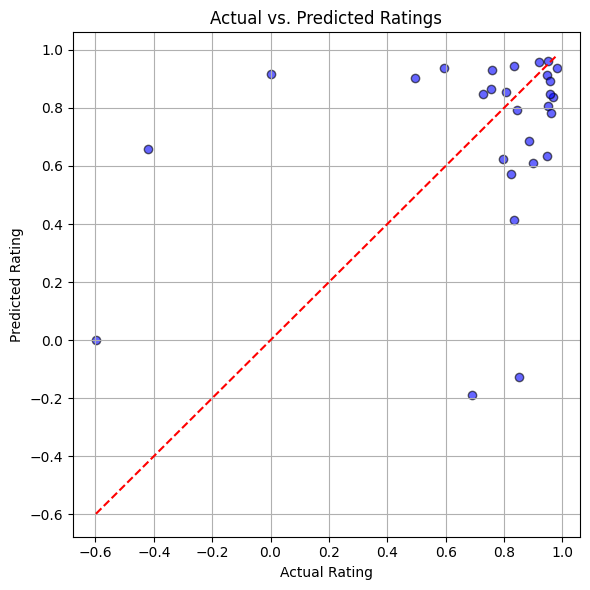

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pred = predict_item_based(user_ratings_train, user_ratings_test, k=5)

filtered = [(a, p) for a, p in pred if not np.isnan(p)]
actuals, preds = zip(*filtered)

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(actuals, preds, alpha=0.6, color='blue', edgecolor='k')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linestyle='--')  # y = x line

plt.title('Actual vs. Predicted Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.grid(True)
plt.tight_layout()
plt.show()